In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr


column_names = ['uniprot_id', 'chembl_id', 'activity']

# Load activity data
train_data = pd.read_csv('activity_train.csv', header=None, names=column_names)
test_data = pd.read_csv('activity_test_blanked.csv', header=None, names=column_names)

# Load molecular fingerprints
with open('mol_bits.pkl', 'rb') as file:
    mol_fingerprints = pickle.load(file)




In [2]:
# Create table of interactions 
interaction_matrix = train_data.pivot(index='uniprot_id', columns='chembl_id', values='activity')
#print(interaction_matrix)
interaction_df = interaction_matrix.reset_index()
interaction_df.set_index('uniprot_id', inplace=True)
display (interaction_df.head())

#center matrix so that null values get the average row value 
def RowCenterMatrix(M):
    V  = M.T
    mat= np.nanmean(V, axis=0)
    VC = V - mat
    VC[np.isnan(VC)]=0
    return VC.T

VC=RowCenterMatrix(interaction_df.values)

# Create a DataFrame from the centered matrix
centered_df = pd.DataFrame(VC, columns=interaction_df.columns, index=interaction_df.index)

# Set display precision
pd.set_option("display.precision", 3)

# Print the centered DataFrame
display(centered_df.head())

chembl_id,CHEMBL10,CHEMBL1000,CHEMBL100003,CHEMBL100004,CHEMBL100045,CHEMBL100052,CHEMBL10007,CHEMBL100071,CHEMBL10009,CHEMBL100104,...,CHEMBL99939,CHEMBL99967,CHEMBL9997,CHEMBL99979,CHEMBL9998,CHEMBL99982,CHEMBL99983,CHEMBL99987,CHEMBL9999,CHEMBL99994
uniprot_id,,,,,,,,,,,,,,,,,,,,,
O14842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O43193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O43613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O43614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O95665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


chembl_id,CHEMBL10,CHEMBL1000,CHEMBL100003,CHEMBL100004,CHEMBL100045,CHEMBL100052,CHEMBL10007,CHEMBL100071,CHEMBL10009,CHEMBL100104,...,CHEMBL99939,CHEMBL99967,CHEMBL9997,CHEMBL99979,CHEMBL9998,CHEMBL99982,CHEMBL99983,CHEMBL99987,CHEMBL9999,CHEMBL99994
uniprot_id,,,,,,,,,,,,,,,,,,,,,
O14842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O43193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O43613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O43614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O95665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Create a DataFrame from molecular fingerprints
fingerprints_df = pd.DataFrame.from_dict(mol_fingerprints, orient='index').fillna(0)
fingerprints_df.index.name = 'chembl_id'
print (fingerprints_df.head())

# Compute the cosine similarity
def compute_similarity(chembl_id, fingerprints_df):
    if chembl_id not in fingerprints_df.index:
        return None

    molecule_fingerprint = fingerprints_df.loc[chembl_id].values.reshape(1, -1)
    similarities = cosine_similarity(molecule_fingerprint, fingerprints_df.values).flatten()
    
    return pd.Series(similarities, index=fingerprints_df.index)

               0    1    2    3    4    5    6    7    8    9    ...  299  \
chembl_id                                                        ...        
CHEMBL2022243   10   38   50   80  107  113  180  217  315  322  ...  0.0   
CHEMBL2022244   10   38   50   80  107  113  180  217  315  322  ...  0.0   
CHEMBL2022245   10   38   50   80  104  107  113  180  184  217  ...  0.0   
CHEMBL2022246   10   38   50   80  107  113  118  123  217  315  ...  0.0   
CHEMBL2022247   10   22   38   50   66   80  107  113  160  180  ...  0.0   

               300  301  302  303  304  305  306  307  308  
chembl_id                                                   
CHEMBL2022243  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
CHEMBL2022244  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
CHEMBL2022245  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
CHEMBL2022246  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
CHEMBL2022247  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 309 columns]


In [6]:
def predict_activity(test_data, train_data, fingerprints_df):
    predictions = []
    for index, row in test_data.iterrows():
        chembl_id = row['chembl_id']
        uniprot_id = row['uniprot_id']
        
        # Compute similarities for the current molecule
        similarities = compute_similarity(chembl_id, fingerprints_df)
        
        if similarities is None:
            # If the molecule is not in the training set, predict the average activity for the specific protein
            protein_avg_activity = train_data[train_data['uniprot_id'] == uniprot_id]['activity'].mean()
            predictions.append(protein_avg_activity)
            continue
        
        # Find the most similar molecules from the training set that have interacted with the same protein
        similar_molecules = similarities.sort_values(ascending=False).index
        similar_activities = train_data[train_data['chembl_id'].isin(similar_molecules) & 
                                        (train_data['uniprot_id'] == uniprot_id)]
        
        if similar_activities.empty:
            # If no similar molecules have activity data for the specific protein, predict the average activity for that protein
            protein_avg_activity = train_data[train_data['uniprot_id'] == uniprot_id]['activity'].mean()
            predictions.append(protein_avg_activity)
        else:
            # Predict the activity as the weighted average of the activities of similar molecules for the same protein
            weights = similarities.loc[similar_activities['chembl_id']]
            weighted_avg_activity = np.average(similar_activities['activity'], weights=weights)
            predictions.append(weighted_avg_activity)
    
    test_data['predicted_activity_1'] = predictions
    return test_data


In [7]:
def CosSim_Matrix(M):
    return np.corrcoef(M)


def estimate_score(df, SM, nn, r, c, verbose=False):
    vals = df.values
    N, M = vals.shape

    # Precompute row means and global mean
    row_means = np.nanmean(vals, axis=1)
    col_means = np.nanmean(vals, axis=0)
    global_mean = np.nanmean(vals)

    sims = [(sim, idx) for idx, sim in enumerate(SM[r]) if not np.isnan(sim) and idx != r]
    sims.sort(key=lambda x: x[0], reverse=True)

    cnt = 0
    S = 0
    Ssims = 0
    for sim, idx in sims:
        if not np.isnan(vals[idx, c]) and sim > 0:
            cnt += 1
            S += sim * vals[idx, c]
            Ssims += sim
            if verbose: print("\tItem:%4d    Score:%4.1f (Sim: %6.3f)" % (idx, vals[idx, c], sim))
        if cnt >= nn: break

    if Ssims <= 0:
        if verbose: print("\tNo similars: outputting the Global Baseline Average")
        rA = row_means[r]
        cA = col_means[c]
        score = min(max(rA + cA - global_mean, 1), 10)              # Adjusted since our scores should be in the range from 1 to 10
        if verbose: print("\tScore: %7.4f" % score)
        return score

    if verbose: print("\tScore: %7.4f" % (S / Ssims))
    return S / Ssims


def predict_activities(test_data, df, SM, nn=5):
    predictions = []
    for index, row in test_data.iterrows():
        uniprot_id = row['uniprot_id']
        chembl_id = row['chembl_id']
        
        if uniprot_id in df.index and chembl_id in df.columns:
            r = centered_df.index.get_loc(uniprot_id)
            c = centered_df.columns.get_loc(chembl_id)
            score = estimate_score(df, SM, nn, r, c)                    
        else:
            # Fallback to global mean if protein or molecule is not found
            score = np.nanmean(df.values)
        
        predictions.append(score)
    
    test_data['predicted_activity_2'] = predictions
    return test_data


### Evaluate the predictions with train set

In [8]:
# Predict activity values for the training set for Content-Based Recommender systems

#Split the data
train_set, validation_set = train_test_split(train_data, test_size=0.2, random_state=42)

train_set = train_set.reset_index(drop=True)
validation_set = validation_set.reset_index(drop=True)


predict_activity(validation_set, train_set, fingerprints_df)

,uniprot_id,chembl_id,activity,predicted_activity_1
0,Q99705,CHEMBL209109,8,5.859
1,P21554,CHEMBL3950235,1,3.737
2,P41594,CHEMBL3603910,1,4.605
3,P35462,CHEMBL3959698,10,5.719
4,P49286,CHEMBL4084568,10,7.113
...,...,...,...,...
27138,Q92633,CHEMBL182773,1,2.483
27139,P30559,CHEMBL2017980,5,5.890
27140,P35462,CHEMBL3943045,8,5.719
27141,P32245,CHEMBL213940,6,5.018


In [9]:
interaction_matrix_train = train_set.pivot(index='uniprot_id', columns='chembl_id', values='activity')
interaction_train_df = interaction_matrix_train.reset_index()
interaction_train_df.set_index('uniprot_id', inplace=True)
VC_train = RowCenterMatrix(interaction_train_df.values)

In [10]:
SM_train = CosSim_Matrix(VC_train)
validation_set_with_predictions = predict_activities(validation_set, interaction_df, SM_train)


In [11]:
validation_set_with_predictions.head()

,uniprot_id,chembl_id,activity,predicted_activity_1,predicted_activity_2
0,Q99705,CHEMBL209109,8,5.859,9.136
1,P21554,CHEMBL3950235,1,3.737,3.000
2,P41594,CHEMBL3603910,1,4.605,1.000
3,P35462,CHEMBL3959698,10,5.719,7.106
4,P49286,CHEMBL4084568,10,7.113,6.000


In [12]:
def calculate_rmse(validation_set):
    rmse_cb = np.sqrt(mean_squared_error(validation_set['activity'], validation_set['predicted_activity_1']))
    rmse_ii = np.sqrt(mean_squared_error(validation_set['activity'], validation_set['predicted_activity_2']))
    rmse_avg = np.sqrt(mean_squared_error(validation_set['activity'], validation_set['activity_avg']))
    return rmse_cb, rmse_ii, rmse_avg


# Check precision for top k% that have higher activity value than 5
def precision_top_k_perc(validation_set, k=10):
    N = int(k/100 * len(validation_set))
    precision_cb = (validation_set.sort_values('predicted_activity_1', ascending=False)
                                    .head(N)['activity'] > 5).mean()
    precision_ii = (validation_set.sort_values('predicted_activity_2', ascending=False)
                                    .head(N)['activity'] > 5).mean()
    precision_avg = (validation_set.sort_values('activity_avg', ascending=False)
                                    .head(N)['activity'] > 5).mean()
    return precision_cb, precision_ii, precision_avg

def spearman_rank_correlation(validation_set):
    spearman_cb, _ = spearmanr(validation_set['activity'], validation_set['predicted_activity_1'])
    spearman_ii, _ = spearmanr(validation_set['activity'], validation_set['predicted_activity_2'])
    spearman_avg, _ = spearmanr(validation_set['activity'], validation_set['activity_avg'])
    return spearman_cb, spearman_ii, spearman_avg





In [13]:
#Evaluating the results
# Calculate the average
validation_set_with_predictions['activity_avg'] = (validation_set_with_predictions['predicted_activity_1'] + validation_set_with_predictions['predicted_activity_2']) / 2

# Round the average to the nearest natural number
validation_set_with_predictions['activity_avg_rounded'] = validation_set_with_predictions['activity_avg'].round().astype(int)

In [14]:

def evaluate_predictions(validation_set, k=10):
    # Calculate RMSE
    rmse_cb, rmse_ii, rmse_avg = calculate_rmse(validation_set)
    
    # Calculate Precision at K
    precision_cb, precision_ii, precision_avg = precision_top_k_perc(validation_set, k)
    
    # Calculate Spearman's Rank Correlation
    spearman_cb, spearman_ii, spearman_avg = spearman_rank_correlation(validation_set)
    
    # Print results
    print(f"RMSE: \n   Content-Based: {rmse_cb}, \n   Item-Item: {rmse_ii}, \n   Combined: {rmse_avg}")
    print(f"Precision for top {k}%: \n   Content-Based: {precision_cb}, \n   Item-Item: {precision_ii}, \n   Combined: {precision_avg}")
    print(f"Spearman Rank Correlation: \n   Content-Based: {spearman_cb}, \n   Item-Item: {spearman_ii}, \n   Combined: {spearman_avg}")

# Use the function to evaluate the predictions, for highest 10% 
k = 10
evaluate_predictions(validation_set, k=k)

RMSE: 
   Content-Based: 2.70337893141458, 
   Item-Item: 2.368236001630587, 
   Combined: 2.1705727482493944
Precision for top 10%: 
   Content-Based: 0.6543846720707442, 
   Item-Item: 0.8802505526897568, 
   Combined: 0.9436256448047163
Spearman Rank Correlation: 
   Content-Based: 0.33161418837400747, 
   Item-Item: 0.6460635161971187, 
   Combined: 0.6602813862740907


In [15]:
# Check how the precision changes for different k
ks = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

precision_cb_list = []
precision_ii_list = []
precision_avg_list =[]

for k in ks:
    precision_cb, precision_ii, precision_avg = precision_top_k_perc(validation_set, k)
    precision_cb_list.append(precision_cb)
    precision_ii_list.append(precision_ii)
    precision_avg_list.append(precision_avg)



In [16]:
mtx = [precision_cb_list, precision_ii_list, precision_avg_list]
precisions= pd.DataFrame(mtx, columns= ks, index=['Content-Based', 'Item-Item', 'Combined'])
display(precisions)

,5,10,15,20,25,30,35,40,45,50
Content-Based,0.657,0.654,0.623,0.606,0.592,0.581,0.562,0.549,0.537,0.524
Item-Item,0.889,0.880,0.887,0.840,0.806,0.765,0.730,0.692,0.656,0.627
Combined,0.976,0.944,0.913,0.860,0.801,0.761,0.719,0.686,0.654,0.629


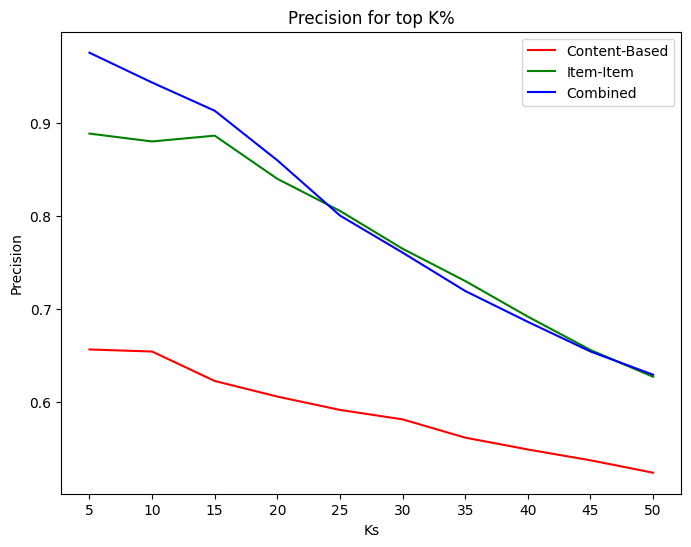

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(ks,precision_cb_list, color = 'red', label = 'Content-Based')
plt.plot(ks,precision_ii_list, color = 'green', label = 'Item-Item' )
plt.plot(ks,precision_avg_list, color = 'blue', label = 'Combined' )
plt.xticks(ks)
plt.ylabel('Precision')
plt.xlabel('Ks')
plt.title('Precision for top K%')
plt.legend()
plt.show()

### Predict activity for test set

In [18]:
# Predict for test data Content-based
predict_activity(test_data, train_data, fingerprints_df)

,uniprot_id,chembl_id,activity,predicted_activity_1
0,O14842,CHEMBL2022258,0,5.371
1,O14842,CHEMBL2047161,0,5.371
2,O14842,CHEMBL2047163,0,5.371
3,O14842,CHEMBL2047168,0,5.371
4,O14842,CHEMBL2047169,0,5.371
...,...,...,...,...
4623,Q9Y5Y4,CHEMBL4208314,0,6.148
4624,Q9Y5Y4,CHEMBL4205421,0,6.148
4625,Q9Y5Y4,CHEMBL4207935,0,6.148
4626,Q9Y5Y4,CHEMBL4208884,0,6.148


In [19]:
SM = CosSim_Matrix(VC)
#make predictions for test data Item-Item CF
test_data_with_predictions = predict_activities(test_data, interaction_df, SM, nn=5)

# Display a sample of the predictions
print(test_data_with_predictions.head())

  uniprot_id       chembl_id  activity  predicted_activity_1  \
0     O14842   CHEMBL2022258         0                 5.371   
1     O14842   CHEMBL2047161         0                 5.371   
2     O14842   CHEMBL2047163         0                 5.371   
3     O14842   CHEMBL2047168         0                 5.371   
4     O14842   CHEMBL2047169         0                 5.371   

   predicted_activity_2  
0                 4.709  
1                 4.709  
2                 4.709  
3                 4.709  
4                 4.709  


In [21]:
#Evaluating the results
# Calculate the average
test_data_with_predictions['activity_avg'] = (test_data_with_predictions['predicted_activity_1'] + test_data_with_predictions['predicted_activity_2']) / 2

# Round the average to the nearest natural number
test_data_with_predictions['activity_avg_rounded'] = test_data_with_predictions['activity_avg'].round().astype(int)


In [22]:
test_data_with_predictions.describe()

,activity,predicted_activity_1,predicted_activity_2,activity_avg,activity_avg_rounded
count,4628.0,4628.000,4628.000,4628.000,4628.000
mean,0.0,4.578,4.315,4.446,4.394
std,0.0,0.954,2.241,1.299,1.341
min,0.0,1.572,1.000,1.286,1.000
25%,0.0,3.879,2.616,3.513,4.000
50%,0.0,4.812,4.709,4.513,5.000
75%,0.0,5.168,5.000,5.307,5.000
max,0.0,6.783,10.000,8.392,8.000


In [23]:
def overlap_measurement(df):
    # Calculates if the recommendations from both methods are close
    overlap_ratios = []
    
    for _, row in df.iterrows():
        content_based = round(row['predicted_activity_1'])
        item_item = round(row['predicted_activity_2'])
        
        # Define overlap if the predictions are within (-1,1) range
        overlap = 1 if abs(content_based - item_item) <= 1 else 0
        
        overlap_ratios.append(overlap)
    
    df['overlap_ratio'] = overlap_ratios
    return df




In [24]:
test_data_with_predictions = overlap_measurement(test_data_with_predictions)

In [25]:
display(test_data_with_predictions)
test_data_with_predictions[['uniprot_id', 'chembl_id', 'activity_avg_rounded']].describe()

,uniprot_id,chembl_id,activity,predicted_activity_1,predicted_activity_2,activity_avg,activity_avg_rounded,overlap_ratio
0,O14842,CHEMBL2022258,0,5.371,4.709,5.040,5,1
1,O14842,CHEMBL2047161,0,5.371,4.709,5.040,5,1
2,O14842,CHEMBL2047163,0,5.371,4.709,5.040,5,1
3,O14842,CHEMBL2047168,0,5.371,4.709,5.040,5,1
4,O14842,CHEMBL2047169,0,5.371,4.709,5.040,5,1
...,...,...,...,...,...,...,...,...
4623,Q9Y5Y4,CHEMBL4208314,0,6.148,4.709,5.428,5,1
4624,Q9Y5Y4,CHEMBL4205421,0,6.148,4.709,5.428,5,1
4625,Q9Y5Y4,CHEMBL4207935,0,6.148,4.709,5.428,5,1
4626,Q9Y5Y4,CHEMBL4208884,0,6.148,4.709,5.428,5,1


,activity_avg_rounded
count,4628.000
mean,4.394
std,1.341
min,1.000
25%,4.000
50%,5.000
75%,5.000
max,8.000


Average Overlap Ratio: 0.5331


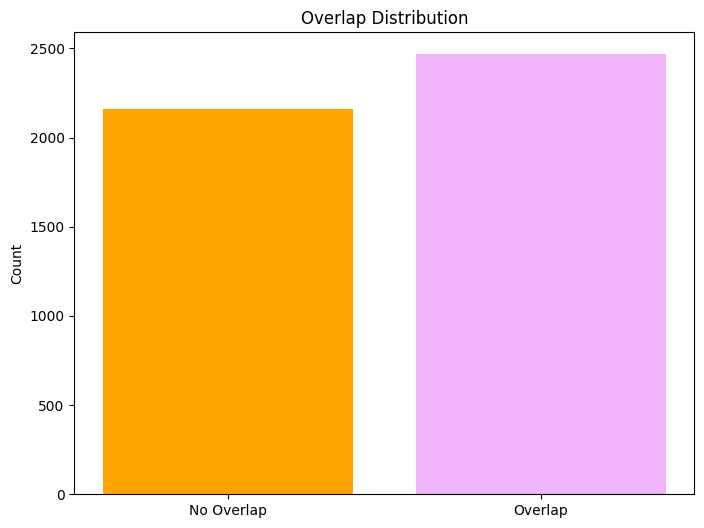

In [26]:
# Calculate the average overlap ratio
average_overlap_ratio = test_data_with_predictions['overlap_ratio'].mean()
print(f"Average Overlap Ratio: {average_overlap_ratio:.4f}")

overlap_counts = test_data_with_predictions['overlap_ratio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(overlap_counts.index, overlap_counts.values, color=['#EFB4F9', 'orange'])
plt.xticks([0, 1], ['No Overlap', 'Overlap'])
plt.ylabel('Count')
plt.title('Overlap Distribution')
plt.show()



In [27]:
selected_columns = test_data_with_predictions[['uniprot_id', 'chembl_id', 'activity_avg']]
selected_columns.to_csv('preds_03.txt', sep=',', index=False, header=False)
